# Libraries

In [18]:
pip install PyYAML==3.12

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 253 kB 14.5 MB/s eta 0:00:01
  Created wheel for PyYAML: filename=PyYAML-3.12-cp38-cp38-linux_x86_64.whl size=43056 sha256=52e58a3140467bb85ec79b15c8a481807807c25b85de79069bbe15515c1c4862
  Stored in directory: /home/dbennour/.cache/pip/wheels/31/8d/c5/0365d01041ade02f8cfd79c457267cc4f02bb77afcc1adaa5d
Successfully built PyYAML
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pytorch-lightning 1.1.8 requires PyYAML!=5.4.*,>=5.1, but you'll have pyyaml 3.12 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import keras

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [1]:
%matplotlib inline
import pandas as pd
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print("TensorFlow version: ", tf.__version__)
import os
import sys 
import pickle as pk
import  pickle
from datetime import datetime
import pandas as pd
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
#import nctoolkit as ncµ
import netCDF4 as nc4
import threading
import datetime as dt  # Python standard library datetime  module
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xbatcher as xb

import imageio
os.environ['PROJ_LIB'] = '/opt/python3-anaconda50-5.0.1-7ipsl.el6/share/proj'


from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from skimage.measure import block_reduce
from keras import callbacks as cbks



TensorFlow version:  2.2.0


In [2]:
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MaxPooling2D, MaxPooling3D, Dropout, BatchNormalization, Flatten, Conv2D, Conv3D, AveragePooling3D, LSTM, Reshape
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import History 

In [3]:
#reload support file 
import sys
import os
py_file_location = "/home/dbennour/DeepPV/"
sys.path.append(os.path.abspath(py_file_location))
import read_cloudalbedo_files, cloud_index_functions, write_cloud_index_files
import PV_Generator
py_file_location = "/home/dbennour/DeepPV/Unet_models/"
sys.path.append(os.path.abspath(py_file_location))
import UNet_model
from read_cloudalbedo_files import *
from PV_Generator import PV_DataGenerator
from UNet_model import *
import importlib
importlib.reload(read_cloudalbedo_files)
importlib.reload(PV_Generator)
importlib.reload(UNet_model)
# type(AECNN_model)
# importlib.reload(write_cloud_index_files)

<module 'UNet_model' from '/home/dbennour/DeepPV/Unet_models/UNet_model.py'>

# Load AECNN

In [6]:
path='/home/dbennour/DeepPV/AECNN_Model/'
aecnn=loadModel("AECNN_v4_2",path)

Yaml Model  AECNN_v4_2 .yaml loaded 
Weights  AECNN_v4_2 .h5 loaded 


# Model 2: CMV prediction

In [7]:
# data_path='/homedata/dbennour/DeepPV/CAL_CMV_slot/'
data_path='/net/nfs/ssd1/dbennour/CAL_CMV_slot/'
data_generator_train = PV_DataGenerator('train_data', data_path,to_fit=True,batch_size=16,model=aecnn)
data_generator_val=PV_DataGenerator('val_data', data_path,to_fit=True,batch_size=16,model=aecnn)
data_generator_test=PV_DataGenerator('test_data', data_path,to_fit=False,batch_size=16,model=aecnn)

## U-Net

In [8]:
model=Unet_build()

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 513, 513, 2, 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 513, 513, 2,  1040        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 513, 513, 2,  64          conv3d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 513, 513, 2,  0           batch_normalization_1[0][0]      
______________________________________________________________________________________________

In [10]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import tensorflow as tf
import tensorflow.keras
from keras import backend as K
from keras import optimizers as opt
from keras import callbacks as cbks
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout,UpSampling2D, Lambda,Cropping3D
from keras.layers import LeakyReLU
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose,Conv3D,Conv3DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D,MaxPooling3D,GlobalMaxPool3D
from keras.layers.merge import concatenate, add
from tensorflow.keras.models import model_from_yaml
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import Adam, Adadelta,SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [11]:
# # To resume training
# from tensorflow.keras.models import model_from_yaml
# from tensorflow.keras.callbacks import *
# results_dir='/net/nfs/ssd1/dbennour/Resultats_ModelPV/'
# callbacks = [ EarlyStopping(patience=10, verbose=1),
#               ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
#               cbks.ModelCheckpoint(results_dir+'Unet-weights.h5', 
#                                    monitor='val_loss', save_best_only=True),
#               TensorBoard(log_dir='/home/dbennour/tmp/Unet')]
# if results_dir is not None:
#     # Load model:
#     with open('/home/dbennour/DeepPV/Unet_models/Unet_v1_2.yaml',"r") as yaml_file:
#         model = model_from_yaml(yaml_file.read())
#     model.load_weights(results_dir+'Unet-weights.h5')
#     # Finding the epoch index from which we are resuming
# #     initial_epoch = get_init_epoch(results_dir)
# #     # Calculating the correct value of count
# #     count = initial_epoch*batches_per_epoch
# #     # Update the value of count in callback instance
# #     callbacks[1].count = count
# else:
#     model = build_model_func()
#     initial_epoch = 0
# sgd=SGD(momentum=0.9, nesterov=False)
# model.compile(optimizer=sgd, loss=root_mean_squared_error, metrics=['mse',R2])

In [12]:
# # To resume training

# history=model.fit(data_generator_train,initial_epoch=6,epochs=10, callbacks=callbacks,validation_data=data_generator_val)

In [ ]:
history=Unet_fit(model,data_generator_train,data_generator_val,1)

 443/2710 [===>..........................] - ETA: 1:31:26 - loss: 0.0758 - mse: 0.0080 - R2: 0.4207

In [ ]:
path='/home/dbennour/DeepPV/Unet_models/'
saveModel(model,"Unet_v2_1",path)

# Results

In [44]:
path='/home/dbennour/DeepPV/Unet_models/'
model=loadModel("Unet_v1_3",path)

Yaml Model  Unet_v1_3 .yaml loaded 
Weights  Unet_v1_3 .h5 loaded 


In [46]:
results_dir='/net/nfs/ssd1/dbennour/Resultats_ModelPV/'
model.load_weights(results_dir+'Unet-weights.h5')

In [47]:
sgd=SGD(momentum=0.9, nesterov=False)
model.compile(optimizer=sgd, loss=root_mean_squared_error, metrics='mse')

In [41]:
X_test_ae,Y_test,X_test=test_data(50,200,aecnn)

In [48]:
model.evaluate(X_test)

5/5 [==============================] - 0s 29ms/step - loss: 0.0000e+00 - mse: 0.0000e+00


[0.0, 0.0]

In [10]:
file_test=xr.open_dataset('/net/nfs/ssd1/dbennour/CAL_CMV_slot/test_data/CAL_CMV_20200801_1400_1415.nc')

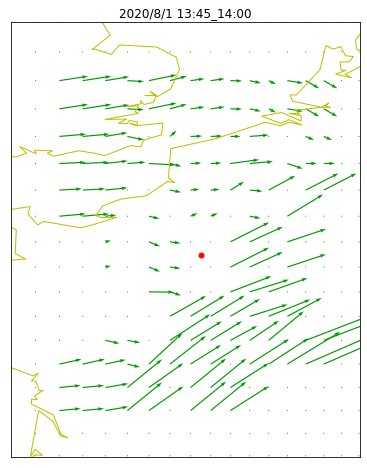

In [33]:
%matplotlib inline
show_CMV('202008011400',on_map=False);

In [12]:
np.unique(file_test[['CMV_X']].to_array().values)

array([-8.36, -7.84, -7.75, -7.2 , -6.94, -6.92, -6.67, -6.66, -6.48,
       -6.27, -5.05, -4.95, -4.88, -4.73, -4.56, -4.3 , -4.26, -4.15,
       -4.13, -3.94, -3.93, -3.89, -3.84, -3.6 , -3.51, -3.1 , -2.67,
       -2.44, -2.1 , -1.93, -1.81, -1.54, -1.18, -1.09, -1.07, -1.01,
       -0.99, -0.97, -0.88, -0.8 , -0.7 , -0.69, -0.55, -0.51, -0.4 ,
       -0.37, -0.33, -0.19, -0.18, -0.16, -0.14, -0.11, -0.07,  0.  ,
        0.02,  0.07,  0.2 ,  0.22,  0.24,  0.26,  0.3 ,  0.32,  0.33,
        0.39,  0.45,  0.56,  0.67,  0.76,  0.79,  0.8 ,  1.  ,  1.02,
        1.04,  1.08,  1.35,  1.62], dtype=float32)

In [14]:
# X_test_ae,Y_test,X_test=test_data(0,50,aecnn)
X_test_T0=file_test[['CAL_T0']].to_array().values
X_test_T015=file_test[['CAL_T0-15']].to_array().values
X_test_T0_ae=aecnn.predict(X_test_T0)
X_test_T015_ae=aecnn.predict(X_test_T015)

Y_test_x=file_test[['CMV_X']].to_array().values
Y_test_y=file_test[['CMV_Y']].to_array().values
X_test=np.empty((1,513,513,2,1))
Y_test=np.empty((1,513,513,2,1))
X_test[:,:,:,0,:]=X_test_T0_ae.reshape((-1,513,513,1))
X_test[:,:,:,1,:]=X_test_T015_ae.reshape((-1,513,513,1))
Y_test[:,:,:,0,:]=Y_test_x.reshape((-1,513,513,1))
Y_test[:,:,:,1,:]=Y_test_y.reshape((-1,513,513,1))
# X_test=X_test.reshape((1,513,513,2,1))
# Y_test=Y_test.reshape((1,513,513,2,1))

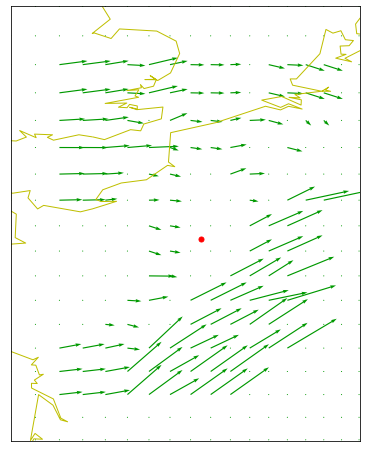

In [36]:
%matplotlib inline
Cal_file=CAL_files()
y1=Y_test[:,:,:,0,:].reshape((513,513))
y2=Y_test[:,:,:,1,:].reshape((513,513))
# cmv_x,cmv_y,cmv_lon,cmv_lat=Cal_file.Read_CMV_image('2016','01','01','1400','1415')
# cmv_x,cmv_y,cmv_lon,cmv_lat=cmv_x.values,cmv_y.values,cmv_lon.values,cmv_lat.values
show_CMV_x_y(y1,y2)



In [20]:
Y_pred=model.predict(X_test)


In [26]:
np.unique(Y_pred[:,:,:,1,:])

array([-0.11452602, -0.10723707, -0.10073683, ...,  0.9724598 ,
        0.9740471 ,  0.97784024], dtype=float32)

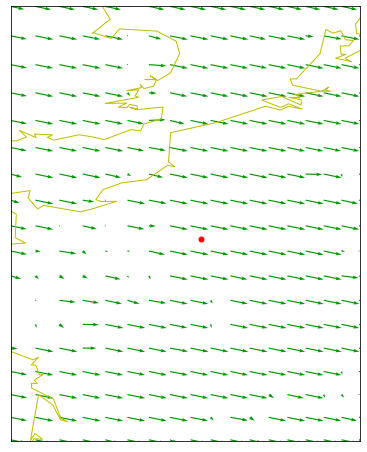

In [27]:
%matplotlib inline
Cal_file=CAL_files()
y1=Y_pred[:,:,:,0,:].reshape((513,513))
y2=Y_pred[:,:,:,1,:].reshape((513,513))*5
# cmv_x,cmv_y,cmv_lon,cmv_lat=Cal_file.Read_CMV_image('2016','01','01','1400','1415')
# cmv_x,cmv_y,cmv_lon,cmv_lat=cmv_x.values,cmv_y.values,cmv_lon.values,cmv_lat.values
show_CMV_x_y(y1,y2)